# The Beatles' Covers Recognition

In [39]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

COVERS_FOLDER_INPUT = "beatles_covers"
COVERS_FOLDER_OUTPUT = "beatles_covers_stft"
BEATLES_FOLDER_INPUT = "beatles_songs"
BEATLES_FOLDER_OUTPUT = "beatles_songs_stft"

Generating the spectograms

In [33]:
def process_audio(file_name, input_folder, output_folder, duration=30, sr=22050):
    y, _ = librosa.load(f"{input_folder}/{file_name}", sr=sr, duration=duration)

    # Trim initial silence
    y_trimmed, _ = librosa.effects.trim(y, top_db=30)
    y_trimmed = y_trimmed[:int(duration * sr)]

    D = librosa.stft(y_trimmed)
    D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    np.save(f"{output_folder}/{file_name}", D_db)

In [ ]:
def generate_spectograms(folder_input, folder_output):
    for file in os.listdir(folder_input):
        output_file = f"{folder_output}/{file}.npy"

        if os.path.exists(output_file):
            print(f"Skipping {file}: Output file already exists.")
            continue

        try:
            process_audio(file, folder_input, folder_output)
        except Exception as e:
            print(f"Error processing {file}: {e}")

generate_spectograms(COVERS_FOLDER_INPUT, COVERS_FOLDER_OUTPUT)
generate_spectograms(BEATLES_FOLDER_INPUT, BEATLES_FOLDER_OUTPUT)

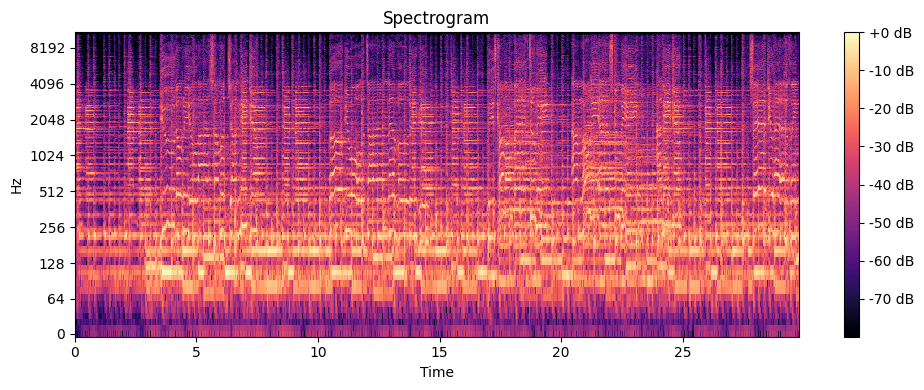

In [46]:
def plot_spectrogram(folder, file_name):
    data = np.load(f"{folder}/{file_name}.npy")

    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(data, sr=22050, x_axis='time', y_axis='log', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

# Example Usage
plot_spectrogram(BEATLES_FOLDER_OUTPUT, "04 The Beatles - I Need You.flac")